<a href="https://colab.research.google.com/github/yenlung/Py-Math-Book/blob/main/%E5%86%92%E9%9A%AA13_Entropy%E6%98%AF%E4%BB%80%E9%BA%BC%E6%A6%82%E5%BF%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

### 1. 資訊量

資訊量 $I$ 我們可以想成是「驚訝指數」, 也就是說一個事件發生機率 $P=1$ 的時候, $I=0$; 如果機率 $P$ 很小, $I$ 應該很大。想想我們可以這樣定義:

$$I = -\log P$$

比如說一個事件發生機率是 1/8 時...

In [ ]:
I = -np.log(1/8)

In [ ]:
I

2.0794415416798357

機率是 1/100 呢?

In [ ]:
I = -np.log(1/100)

In [ ]:
I

4.605170185988091

果然變大了!

如果以 2 為底的 log, 還會有一個特別的意義。例如有 8 個不同類別的事件, 我們會用 1, 2, 3,... 給每個事件編號。一般我們會把機率最大的放 1, 第二大叫 2, 以此類推。

為什麼呢? 原因是 1 二進位數只要 1 個 bit, 2 要兩個。機率越大, 自然希望用越少的資源傳送。

比方說有 8 個不同類別的事件, 如果每個事件機率都是 1/8, 用以 2 為底的 log 計算。

In [ ]:
I = -np.log2(1/8)

In [ ]:
I

3.0

In [ ]:
np.log2(8)

3.0

這兩者的 3 都是有 8 種情況, 至少要  3 位元!

### 2. Entropy (熵/亂度)

一個機率分佈

$$P = (p_1, p_2, \ldots, p_n)$$

我們可以算資訊量 (驚訝指數) 的期望值。

$$H(P) = -\sum_{i=1}^n p_i \log p_i$$

這也就是「平均驚訝指數」, 也可以說就是「亂度」。

假設是只有兩個事件的機率分佈 $P = (p_1, p_2)$, 來算算 $P$ 的 entropy。

In [ ]:
def entropy(p=0.5):
    n = 100
    n1 = int(100*p)
    n2 = n - n1
    x1 = np.random.rand(n1)
    y1 = np.random.rand(n1)
    x2 = np.random.rand(n2)
    y2 = np.random.rand(n2)
    plt.scatter(x1, y1, s=50, c='r', alpha=0.7)
    plt.scatter(x2, y2, s=50, c='b', alpha=0.7)
    p1 = p
    p2 = 1-p
    Hp = -p1*np.log(p1) - p2*np.log(p2)
    print(f"Entropy = {Hp:.2f}")

試用看看。

Entropy = 0.69


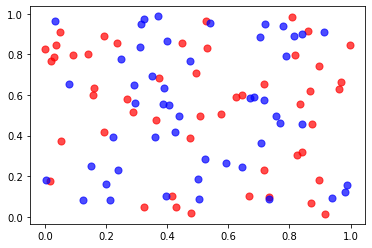

In [ ]:
entropy(p=0.5)

來試試不同機率分佈, 算出的 entropy 有什麼不同。

In [ ]:
from ipywidgets import interact, interact_manual

In [ ]:
interact(entropy, p=(0.01, 0.99, 0.01));

interactive(children=(FloatSlider(value=0.5, description='p', max=0.99, min=0.01, step=0.01), Output()), _dom_…

可以發現, 如果 $P=(0.5, 0.5)$, 也就是不同色的球各半, 看來比較亂, 這時的 entropy 很大; 如果幾乎是某一色的球, 很單一, 亂度就比較小。

### 3. Cross Entropy

在分類問題計算誤差時, 我們會發現用平常愛用的均方差其實不一定是最適合的。比方說, 今天我們要做小純、小佑、小潔三個人的人臉辨識, 會給她們各自的編號, 比如小純是 1, 小佑是 2, 小潔是 3。今天一張小佑的照片, 「正確」答案假設是

$$P = (p_1=0, p_2=1, p_3=0)$$

也就是答案是類別 2 的小佑, 而我們的 AI 模型答案是

$$Q = (q_1=0.2, q_2=0.7, q_3=1)$$

基本上我們只在意 $q_2$ 是多少, 如果 $q_2=1$ 那是完全命中, 所以扣 0 分; 如果 $q_2$ 很小, 要大扣分!

所以我們可以用

$$-\log q_2$$

當誤差大小! 這個量叫 cross entropy, 注意這剛好是機率是 $q_2$ 的資訊量! 寫個互動來看看不同的機率分佈, 均方差和 cross entropy 的差別。

In [ ]:
def compare(q1=0.2, q2=0.7):
    # 正確: [0, 1, 0]
    p1 = 0
    p2 = 1
    p3 = 0
    q3 = 1-q1-q2
    mse = (p1-q1)**2 + (p2-q2)**2 + (p3-q3)**2
    ce = -np.log(q2)
    print(f"q1={q1:.2f} q2={q2:.2f} q3={q3:.2f}")
    print(f"均方差: {mse:.4f}")
    print(f"Cross Entropy: {ce:.4f}")

In [ ]:
compare(0.2, 0.7)

q1=0.20 q2=0.70 q3=0.10
均方差: 0.1400
Cross Entropy: 0.3567


在正確答案的部份, 我們答案是 0.7, 可以發現 cross entropy 不論其他答案如何, 誤差大小是一樣的。這是我們要的 -- 我們不在意其他說錯的部份, 想專注在對的地方。可以用互動模式看得更清楚。

In [ ]:
interact(compare, q1=(0.01, 0.99), q2=(0.01, 0.99));

interactive(children=(FloatSlider(value=0.2, description='q1', max=0.99, min=0.01), FloatSlider(value=0.7, des…

一般來說, 如果有兩個機率分佈 $P, Q$, 其中

$$P = (p_1, p_2, \ldots, p_n)$$

而

$$Q = (q_1, q_2, \ldots, q_n)$$

Cross entroy $H(P,Q)$ 的定義為:

$$H(P,Q) = -\sum_{i=1}^n p_i \log(q_i)$$

### 4. Cross Entropy 和 Entropy 的關係

現在假設 P 是「正確的」機率分佈, 而 Q 是我們模擬出來的。等一下我們實驗 P 的 entropy ($H(P)$) 和 P 與 Q 的 cross entropy ($H(P,Q)$) 有什麼關係。

再一次, cross entropy 是是看 P, Q 兩個分佈差距多少的一個測量的方式。為了簡單化, 假設 P, Q 都只有兩個事件, 所以這兩個機率分佈可以寫成 $P=(p_1, p_2)$, 及 $Q=(q_1, q_2)$。

In [37]:
def cross_entropy(p=0.5, q=0.5):
    n = 100
    p1 = p
    p2 = 1-p
    q1 = q
    q2 = 1-q
    C = np.random.rand(n, 2)
    np1 = int(100*p)
    np2 = n - np1
    nq1 = int(100*q)
    nq2 = n - nq1
    P1 = C[:np1]
    P2 = C[np1:]
    Q1 = C[:nq1]
    Q2 = C[nq1:]
    plt.subplot(121)
    plt.scatter(P1[:,0], P1[:,1], s=50, c='r', alpha=0.7)
    plt.scatter(P2[:,0], P2[:,1], s=50, c='b', alpha=0.7)
    plt.subplot(122)
    plt.scatter(Q1[:,0], Q1[:,1], s=50, c='r', alpha=0.7)
    plt.scatter(Q2[:,0], Q2[:,1], s=50, c='b', alpha=0.7)
    Hp = -p1*np.log(p1) - p2*np.log(p2)
    Hpq = -p1*np.log(q1) - p2*np.log(q2)
    print(f"P = ({p1:.2f}, {p2:.2f})")
    print(f"Q = ({q1:.2f}, {q2:.2f})")
    print(f"P 的 entropy = {Hp:.4f}")
    print(f"P, Q 的 cross entropy = {Hpq:.4f}")

注意這個函式引數 p 是 $p_1$ 的機率, $p_2$ 的機率自然是  1-p; 同樣的, q 是 $q_1$ 的機率, $q_2$ 的機率自然是  1-q。和之前一樣, 第一類我們用紅色表示, 第二類是藍色。左邊是 P 分佈的狀況, 右邊是 Q 分佈。

P = (0.50, 0.50)
Q = (0.50, 0.50)
P 的 entropy = 0.6931
P, Q 的 cross entropy = 0.6931


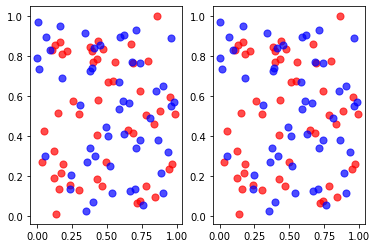

In [38]:
cross_entropy(0.5, 0.5)

再一次用數值滑桿互動實驗, 注意 entropy 和 cross entropy 的大小關係。

In [ ]:
interact_manual(cross_entropy, p=(0.01, 0.99, 0.01), q=(0.01, 0.99, 0.01));

interactive(children=(FloatSlider(value=0.5, description='p', max=0.99, min=0.01, step=0.01), FloatSlider(valu…

實驗後會發現, P, Q 的 cross entropy $H(P,Q)$ 最小的可能是 P 的 entropy $H(P)$, 而這在 P, Q 完全是一樣的機率分佈時會達成。所以 $H(P,Q)$ 真的可以測量 P, Q 間的差異大小。

### 5.  Kullback–Leibler divergence

機器學習處理分類問題時, 我們常會看到用 cross entropy 當作誤差的計算。事實上還有一個常見看來更複雜的 Kullback–Leibler divergence (KL-divergence)。其實原理很簡單, 我們用 $H(P,Q)$ 當作 P 和 Q 之間的差異, 但沒有差別時值居然是 $H(P)$ 而不是 0! 那該如何呢? 是不是很容易, 減去 $H(P)$ 就好了!!

$$\mathrm{KL}(P\| Q) = H(P,Q) - H(P)$$

我們最後來個小實驗, 看看 $H(P)$, $H(P,Q)$ 和 $\mathrm{KL}(P\| Q)$ 間的關係。

In [41]:
def KLdiv(p=0.5,q=0.5):
    p1 = p
    p2 = 1-p
    q1 = q
    q2 = 1-q
    Hp = -p1*np.log(p1)-p2*np.log(p2)
    Hpq = -p1*np.log(q1)-p2*np.log(q2)
    KL = Hpq - Hp
    print(f"P=({p1:.2f}, {p2:.2f})")
    print(f"Q=({q1:.2f}, {q2:.2f})")
    print()
    print(f"(目標的) entropy = {Hp:.4f}")
    print(f"cross entropy = {Hpq:.4f}")
    print(f"KL-divergence = {KL:.4f}")

In [40]:
KLdiv(0.4,0.6)

P=(0.40, 0.60)
Q=(0.60, 0.40)

(目標的) entropy = 0.6730
cross entropy = 0.7541
KL-divergence = 0.0811


再次以互動實驗, 注意兩個機率分佈相同時, KL-divergence 的值為 0。

In [42]:
interact(KLdiv, p=(0.01, 0.99, 0.01), q=(0.01, 0.99, 0.01));

interactive(children=(FloatSlider(value=0.5, description='p', max=0.99, min=0.01, step=0.01), FloatSlider(valu…